In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from IPython.display import HTML
from collections import deque
import importlib


%load_ext autoreload
%autoreload 2

import simulation
import controller
from simulation import *
from main_bus import MainBus

Using TensorFlow backend.


### Initialization

In [2]:
whole_day = 1440

# Parameters

replay_length = 100000
iterations = 144 # num of ticks before training
epochs = 2000 # num of times network is unfrozen, trained
batch_size = 32 # num of samples from replay memory to train on
animate = False
add_arrivals_noise = False

# Model
loggers = [StateLogger(bus_id=24, save_every=1)]
simulation = Simulation(MainBus, loggers=loggers)
replay_memory = deque(maxlen = replay_length)
training_results = []
training_loss = []
delivered_passeners = []

save_every = 10

Initializing Prob Dist


In [3]:
simulation.reset()
simulation.execute(iterations=100, animate=True, interval=500)

{'Bus 24 State Logger': []}

In [4]:
HTML(simulation.anim.to_html5_video())

0Yet another decision of bus 24
0.0724637681159 0.0 0.0 0.0416666666667
4 -0.0724637681159
0.0289855072464 0.0 0.0 0.0416666666667
9 -0.0289855072464
0.0434782608696 0.0 0.0 0.0416666666667
16 -0.0434782608696
0.0434782608696 0.0 0.0 0.0416666666667
20 -0.0434782608696
Bus 24 goes to 9 

5Yet another decision of bus 24
0.185185185185 0.072213460981 1e-05 0.530612244898
3 -0.185175185185
0.037037037037 0.0835008290557 1e-05 0.0204081632653
8 -0.037027037037
0.037037037037 0.844285709963 1e-05 0.0204081632653
20 -0.037027037037
Bus 24 goes to 8 

Yet another decision of bus 25
0.0714285714286 0.0115248648674 0.0 0.351351351351
4 -0.0714285714286
0.0428571428571 0.0207254546988 1e-05 0.0135135135135
9 -0.0428471428571
0.0428571428571 0.094358328933 1e-05 0.351351351351
16 -0.0428471428571
0.0428571428571 0.873391351501 1e-05 0.0135135135135
20 -0.0428471428571
Bus 25 goes to 9 

10Yet another decision of bus 25
0.0609756097561 0.012310148928 0.0 0.929012345679
3 -0.0609756097561
0.1829268

In [5]:
print('\r\tdelivered:{}'.format(simulation.controller.num_passengers_delivered))

	delivered:7


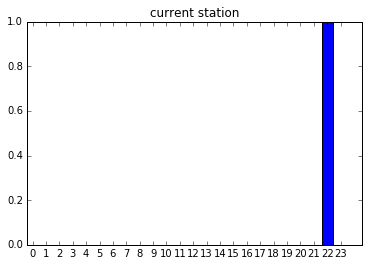

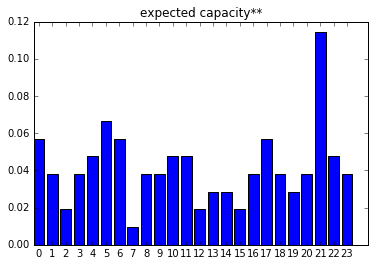

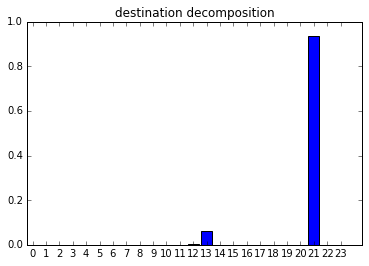

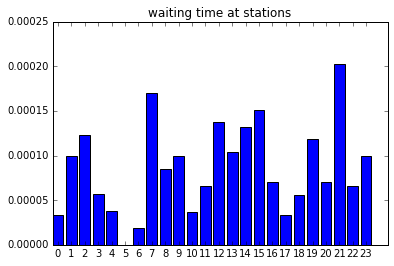

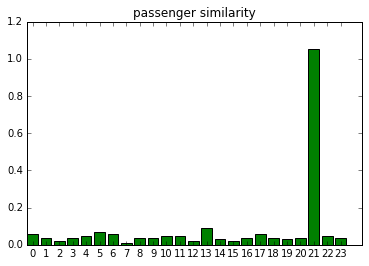

In [5]:
choice = 5


state = simulation.controller.logged_data['Bus 24 State Logger'][choice].T
s = np.zeros((24,1))
titles = ['current station','expected capacity**','destination decomposition','waiting time at stations','passenger similarity']
for i in range(5):
    if i>0:
        s += state[i*24:(i+1)*24] * (0 if i==4 else 1)
        #print(i)
        #print(state[i*24:(i+1)*24])
    
    if i != 4:
        plt.title(titles[i])
        #plt.bar(range(24), s)
        plt.bar(range(24), state[i*24:(i+1)*24])
        plt.xticks(np.array(range(24))+0.4,range(24))
        plt.show()
        
plt.title(titles[i])
plt.bar(range(24), s, color='g')
plt.xticks(np.array(range(24))+0.4,range(24))
plt.show()
    
